In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="whitegrid")
import os
import glob as gb
import cv2
import tensorflow as tf
import keras
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, label_ranking_average_precision_score, label_ranking_loss, coverage_error


TypeError: Descriptors cannot not be created directly.
If this call came from a _pb2.py file, your generated code is out of date and must be regenerated with protoc >= 3.19.0.
If you cannot immediately regenerate your protos, some other possible workarounds are:
 1. Downgrade the protobuf package to 3.20.x or lower.
 2. Set PROTOCOL_BUFFERS_PYTHON_IMPLEMENTATION=python (but this will use pure-Python parsing and will be much slower).

More information: https://developers.google.com/protocol-buffers/docs/news/2022-05-06#python-updates

In [10]:
pip install --user protobuf==3.20.x

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement protobuf==3.20.x (from versions: 2.0.0b0, 2.0.3, 2.3.0, 2.4.1, 2.5.0, 2.6.0, 2.6.1, 3.0.0a2, 3.0.0a3, 3.0.0b1, 3.0.0b1.post1, 3.0.0b1.post2, 3.0.0b2, 3.0.0b2.post1, 3.0.0b2.post2, 3.0.0b3, 3.0.0b4, 3.0.0, 3.1.0, 3.1.0.post1, 3.2.0rc1, 3.2.0rc1.post1, 3.2.0rc2, 3.2.0, 3.3.0, 3.4.0, 3.5.0.post1, 3.5.1, 3.5.2, 3.5.2.post1, 3.6.0, 3.6.1, 3.7.0rc2, 3.7.0rc3, 3.7.0, 3.7.1, 3.8.0rc1, 3.8.0, 3.9.0rc1, 3.9.0, 3.9.1, 3.9.2, 3.10.0rc1, 3.10.0, 3.11.0rc1, 3.11.0rc2, 3.11.0, 3.11.1, 3.11.2, 3.11.3, 3.12.2, 3.12.4, 3.13.0rc3, 3.13.0, 3.14.0rc1, 3.14.0rc2, 3.14.0rc3, 3.14.0, 3.15.0rc1, 3.15.0rc2, 3.15.0, 3.15.1, 3.15.2, 3.15.3, 3.15.4, 3.15.5, 3.15.6, 3.15.7, 3.15.8, 3.16.0rc1, 3.16.0rc2, 3.16.0, 3.17.0rc1, 3.17.0rc2, 3.17.0, 3.17.1, 3.17.2, 3.17.3, 3.18.0rc1, 3.18.0rc2, 3.18.0, 3.18.1, 3.18.3, 3.19.0rc1, 3.19.0rc2, 3.19.0, 3.19.1, 3.19.2, 3.19.3, 3.19.4, 3.19.5, 3.19.6, 3.20.0rc1, 3.20.0rc2, 3.20.0, 3.20.1rc1, 3.20.1, 3.20.2, 3.20.3, 4.0

In [2]:
pip install --upgrade tensorflow

     -------------------------------------- 272.8/272.8 MB 6.4 MB/s eta 0:00:00
     ---------------------------------------- 1.2/1.2 MB 15.8 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
     ------------------------------------- 440.7/440.7 kB 13.9 MB/s eta 0:00:00
     ---------------------------------------- 5.6/5.6 MB 14.4 MB/s eta 0:00:00
     ---------------------------------------- 14.6/14.6 MB 9.9 MB/s eta 0:00:00
     ---------------------------------------- 1.7/1.7 MB 15.7 MB/s eta 0:00:00
     -------------------------------------- 120.4/120.4 kB 6.9 MB/s eta 0:00:00
     ------------------------------------- 178.2/178.2 kB 11.2 MB/s eta 0:00:00
     ----------------------------

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\dixit\\AppData\\Roaming\\Python\\Python310\\site-packages\\~umpy\\.libs\\libopenblas64__v0.3.21-gcc_10_3_0.dll'
Consider using the `--user` option or check the permissions.


[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.Collecting opencv-python
     ---------------------------------------- 38.2/38.2 MB 9.4 MB/s eta 0:00:00




[notice] A new release of pip available: 22.3.1 -> 23.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
imges_path = '../input/tufts-dental-database/Tufts Dental Database/Radiographs/'
labels_path = '../input/tufts-dental-database/Tufts Dental Database/Segmentation/teeth_mask/'

In [3]:
imge_path =  os.listdir(imges_path)
label_path = os.listdir(imges_path)

In [4]:
image_path_test = imge_path[:]
label_path_test = label_path[:]

In [5]:
image_path_test[2]

'771.JPG'

In [6]:
label_path_test[2]

'771.JPG'

In [7]:
X = []
image_name = []
for file in image_path_test : 
        image = plt.imread(imges_path+file)
        image = cv2.resize(image, (256,256))/255
        image = image.astype(np.float32)
        X.append(image)
        image_name.append(file)

In [8]:
image_name[2]

'771.JPG'

In [9]:
y = []
label_name = []
for file in label_path_test : 
        label = plt.imread(labels_path+ file.lower()).astype(np.float32)
        label = cv2.resize(label, (256,256))/255
        label = label.astype(np.float32)
        y.append(label)
        label_name.append(file)

In [10]:
label_name[2]

'771.JPG'

Text(0.5, 1.0, 'Label')

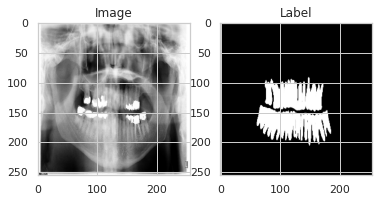

In [11]:
plt.subplot(1,2,1)
plt.imshow(X[3])
plt.title('Image')


plt.subplot(1,2,2)
plt.imshow(y[3])
plt.title('Label')

In [12]:
X = np.array(X)
y = np.array(y)

In [13]:
from sklearn.model_selection import train_test_split

X_train,X_test1,y_train,y_test1 = train_test_split(X,y ,test_size = 0.3 ,random_state=100)

print(X_train.shape)
print(y_train.shape)
print("***********")
print(X_test1.shape)
print(y_test1.shape)

(700, 256, 256, 3)
(700, 256, 256, 3)
***********
(300, 256, 256, 3)
(300, 256, 256, 3)


In [14]:
X_test,X_validate,y_test,y_validate = train_test_split(X_test1,y_test1 ,test_size = 0.5 ,random_state=100)

print(X_test.shape)
print(y_test.shape)
print("***********")
print(X_validate.shape)
print(y_validate.shape)

(150, 256, 256, 3)
(150, 256, 256, 3)
***********
(150, 256, 256, 3)
(150, 256, 256, 3)


In [15]:
from tensorflow.keras import Input
from tensorflow.keras.models import Model, load_model, save_model
from tensorflow.keras.layers import Input, Activation, BatchNormalization, Dropout, Lambda, Conv2D, Conv2DTranspose, MaxPooling2D, concatenate
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from keras import backend as K
#K.set_image_data_format('channels_last')

In [16]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, UpSampling2D, Input, MaxPooling2D, Concatenate , Dropout
from tensorflow.keras.models import Model
from tensorflow import keras

def conv_block(x,num_filters):
    
    x=Conv2D(num_filters,(5,5),padding='same')(x)
    x=BatchNormalization()(x)
    x=Activation('relu')(x)
    
    x=Conv2D(num_filters,(3,3),padding='same')(x)
    x=BatchNormalization()(x)
    x=Activation('relu')(x)
    
    x=Conv2D(num_filters,(3,3),padding='same')(x)
    x=BatchNormalization()(x)
    x=Activation('relu')(x)
    x = Dropout(0.2)(x)
    
    
    return x
    

def build_model():
    size=256
    num_filters=[16,32,48,64]
    
    inputs=Input(shape=(size,size,3))
    skip_x=[]
    x=inputs
    
    #Encoder
    for f in num_filters:
        x=conv_block(x,f)
        skip_x.append(x)
        x=MaxPooling2D(2,2)(x)
        

    #bottleneck
    x=conv_block(x,num_filters[-1])
    
    num_filters.reverse()
    skip_x.reverse()
    
    #Decoder
    for i,f in enumerate(num_filters):
        x=UpSampling2D((2,2))(x)
        xs=skip_x[i]
        x=Concatenate()([x,xs])
        x=conv_block(x,f)
    #output
    x=Conv2D(3,(1,1),padding='same')(x)
    x=Activation('sigmoid')(x)
    return Model(inputs,x)


In [17]:
model = build_model()
model.summary()

2022-10-08 01:04:49.131571: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-08 01:04:49.139798: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-08 01:04:49.140489: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-10-08 01:04:49.141887: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 256, 256, 16) 1216        input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 256, 256, 16) 64          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 256, 256, 16) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [18]:
import os
import numpy as np
import cv2
from glob import glob
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau, CSVLogger, TensorBoard

def iou(y_true, y_pred):
    def f(y_true, y_pred):
        intersection = (y_true * y_pred).sum()
        union = y_true.sum() + y_pred.sum() - intersection
        x = (intersection + 1e-15) / (union + 1e-15)
        x = x.astype(np.float32)
        return x
    return tf.numpy_function(f, [y_true, y_pred], tf.float32)


In [19]:
from tensorflow.keras import backend as K
def dice_coef(y_true, y_pred):
    y_true_f = K.flatten(y_true)
    y_pred_f = K.flatten(y_pred)
    intersection = K.sum(y_true_f * y_pred_f)
    return (2. * intersection + 0.0001) / (K.sum(y_true_f) + K.sum(y_pred_f) + 0.0001)

def dice_coef_loss(y_true, y_pred):
    return 1 - dice_coef(y_true, y_pred)

In [20]:
import tensorflow_addons as tfa
step = tf.Variable(0, trainable=False)

schedule = tf.optimizers.schedules.PiecewiseConstantDecay([10000, 15000], [1e-0, 1e-1, 1e-2])

lr = 1e-1 * schedule(step)
wd = lambda: 1e-4 * schedule(step)

optimizer = tfa.optimizers.AdamW(learning_rate=lr, weight_decay=wd)

In [21]:
model.compile(optimizer=optimizer, loss=[dice_coef_loss], metrics=[dice_coef , iou])

In [22]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)
history = model.fit(X_train,y_train,epochs=100, validation_data=(X_validate , y_validate), callbacks=[callback])

2022-10-08 01:04:52.325481: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100


2022-10-08 01:04:56.475958: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


22/22 [==============================] - 17s 475ms/step - loss: 0.6993 - dice_coef: 0.3021 - iou: 0.1832 - val_loss: 0.7971 - val_dice_coef: 0.2029 - val_iou: 0.1129
Epoch 2/100
22/22 [==============================] - 8s 346ms/step - loss: 0.3520 - dice_coef: 0.6486 - iou: 0.4835 - val_loss: 0.7971 - val_dice_coef: 0.2029 - val_iou: 0.1129
Epoch 3/100
22/22 [==============================] - 8s 344ms/step - loss: 0.2385 - dice_coef: 0.7617 - iou: 0.6154 - val_loss: 0.7971 - val_dice_coef: 0.2029 - val_iou: 0.1129
Epoch 4/100
22/22 [==============================] - 8s 349ms/step - loss: 0.1945 - dice_coef: 0.8055 - iou: 0.6746 - val_loss: 0.7957 - val_dice_coef: 0.2042 - val_iou: 0.1137
Epoch 5/100
22/22 [==============================] - 8s 347ms/step - loss: 0.1703 - dice_coef: 0.8297 - iou: 0.7091 - val_loss: 0.7970 - val_dice_coef: 0.2030 - val_iou: 0.1130
Epoch 6/100
22/22 [==============================] - 8s 343ms/step - loss: 0.1556 - dice_coef: 0.8445 - iou: 0.7310 - val_loss

Text(0, 0.5, 'iou')

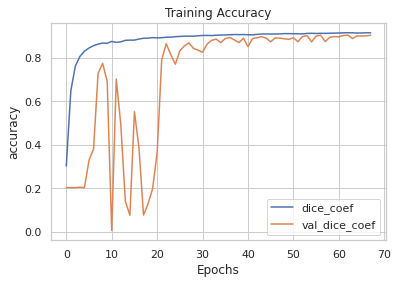

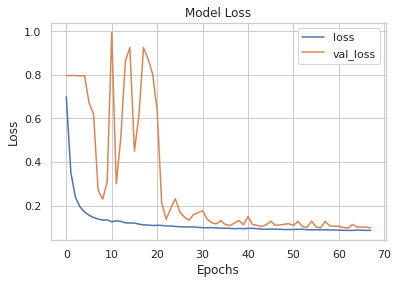

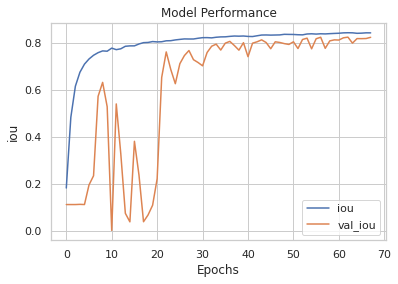

In [23]:
# converting hsitory to dataframe
pd.DataFrame(history.history)

pd.DataFrame(history.history)[['dice_coef', 'val_dice_coef']].plot()
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('accuracy')

pd.DataFrame(history.history)[['loss', 'val_loss']].plot()
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')

pd.DataFrame(history.history)[['iou', 'val_iou']].plot()
plt.title('Model Performance')
plt.xlabel('Epochs')
plt.ylabel('iou')

In [24]:
y_pred = model.predict(X_test)

In [25]:
print("Evaluate on test data")
results = model.evaluate(X_test, y_test)
print("test loss, test acc:", results)

Evaluate on test data
5/5 [==============================] - 1s 111ms/step - loss: 0.0962 - dice_coef: 0.9038 - iou: 0.8245
test loss, test acc: [0.09621842950582504, 0.903823971748352, 0.8245278596878052]


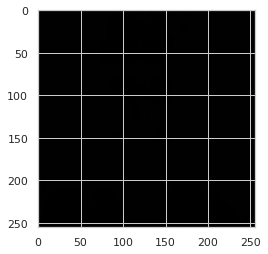

In [26]:
import cv2
cv2.imwrite('color_img.jpg', X_test[0])
img = cv2.imread("./color_img.jpg", cv2.IMREAD_COLOR)
plt.imshow(img)

Text(0.5, 1.0, 'Predicted Label')

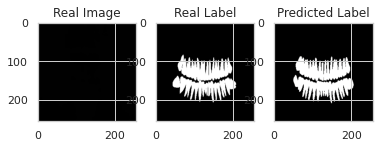

In [27]:
plt.subplot(1,3,1)
plt.imshow(img)
plt.title('Real Image')

plt.subplot(1,3,2)
plt.imshow(y_test[0])
plt.title('Real Label')


plt.subplot(1,3,3)
plt.imshow(y_pred[0])
plt.title('Predicted Label')